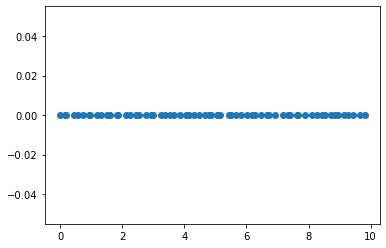

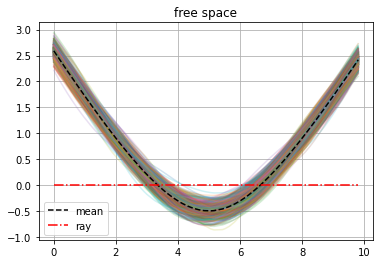

<IPython.core.display.Javascript object>

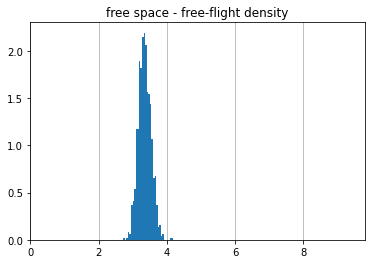

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ray_o = np.array([0,0,0])
ray_d = np.array([1,0,0])

def make_points(ray_o, ray_d, t):
    return ray_o[None,:] + t[:,None] * ray_d[None,:]

t = np.fromfile('deriv-ts.bin', dtype=np.float32)

points = make_points(ray_o, ray_d, t)

plt.scatter(points[:,0], points[:,1])
plt.show()

nps = len(t)

mean = np.reshape(np.fromfile('deriv-mean.bin', dtype=np.float32), (-1,nps))[0]
samples = np.reshape(np.fromfile('deriv-samples-free.bin', dtype=np.float32), (-1,nps))

plt.title("free space")
for sample in samples:
    plt.plot(t, sample[:nps], alpha=0.2)
plt.plot(t, mean[:nps], "--", alpha=1, color="black", label="mean")
plt.plot(t, np.zeros_like(t), "-.", color="red", label="ray")
plt.legend()
plt.grid()
plt.show()

dist_samples = np.fromfile('deriv-dist-samples-free.bin', dtype=np.float32)
grad_samples = np.reshape(np.fromfile('deriv-grad-samples-free.bin', dtype=np.float32), (len(dist_samples),3))

%matplotlib notebook 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

dpoints = make_points(ray_o, ray_d, dist_samples)
ax.scatter(dpoints[:,0], dpoints[:,1], dpoints[:,2])
ax.plot(points[:,0], points[:,1], zs=points[:,2])

ax.set_xlim(0.5, 4.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#plt.xlim(0, t.max())
ax.grid(True, axis="x")
#ax.set_aspect('equal')

N=200
stride=2
u = np.linspace(0, 2 * np.pi, N)
v = np.linspace(0, np.pi, N)
x = np.outer(np.cos(u), np.sin(v)) * 3 + 5
y = np.outer(np.sin(u), np.sin(v))  * 3 + 2.5
z = np.outer(np.ones(np.size(u)), np.cos(v)) * 3 + 0
ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride, alpha=0.5, color="red")


ax.quiver(
    dpoints[:100, 0], dpoints[:100, 1], dpoints[:100, 2],
    grad_samples[:100,0], grad_samples[:100,1], grad_samples[:100,2], 
    length=0.5, normalize=False, alpha=0.5)


plt.show()

%matplotlib inline
plt.title("free space - free-flight density")
plt.hist(dist_samples, bins=32, density=True)
plt.xlim(0, t.max())
plt.grid(True, axis="x")
plt.show()
